<a href="https://colab.research.google.com/github/EvoDmiK/TIL/blob/main/AI_study/basic/pytorch/3_torch_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. 참고자료**
## **0-1. 도서**
- 한빛 미디어 | 펭귄브로의 3분 딥러닝 - 파이토치 맛

## **0-2. 웹사이트**
- Aditi Rastogi Medium - ResNet50 | [[ResNet 50 구조]](https://blog.devgenius.io/resnet50-6b42934db431)  


## **0-3. 데이터 셋** 
- torchvision | Fashion MNIST  

# **1. 합성곱 연산 (Convolution)**
- 계층적으로 인식할 수 있도록 단계마다 다양한 필터를 적용하여 이미지의 특징을 추출  
- 필터를 적용할 때 이미지 왼쪽에서 오른쪽 밑까지 밀어가며 곱하고 더하는데, 이를 **합성곱 연산(Colvolution)**이라고 한다.  
- 모든 종류의 이미지에 대해 필터를 만들 수도 없고 만드는 사람의 실력에 따라 모델 성능이 달라진다.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

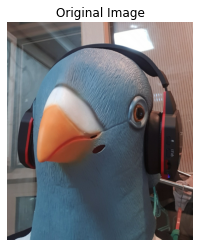

In [2]:
image = cv2.imread('drive/MyDrive/test.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.title('Original Image')
plt.axis(False)
plt.imshow(image)

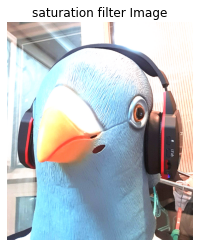

In [3]:
## 채도를 높이는 필터

sat_filter = np.array([[0, 0, 0, 0, 0], [0, 0, -2, 0, 0], [0, -2, 10, -2, 0], [0, 0, -2, 0, 0], [0, 0, 0, 0, 0]])
sat_image  = cv2.filter2D(image, -1, sat_filter)

plt.title('saturation filter Image')
plt.axis(False)
plt.imshow(sat_image)

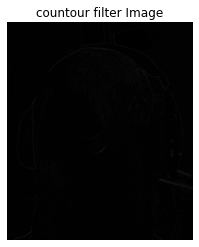

In [4]:
## 윤곽선 검출 필터
countour_filter = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

countour_image  = cv2.filter2D(image, -1, countour_filter)

plt.title('countour filter Image')
plt.axis(False)
plt.imshow(countour_image)

## 잘 안나왔다..

# **2. CNN (Convolution Neural Network) 모델**
- 이미지에서 특징을 추출하는 필터를 학습하는 신경망 모델.  
 **< ! > 필터가 하나의 작은 신경망 역할을 함.**
- 일반적으로 **컨볼루션 계층(Convolution Layer)**, **풀링 계층(Pooling Layer)**, 특징들을 모아 최종 분류하는  
일반적인 인공 신경망 계층으로 구성  
- 이미지 크기만큼의 가중치를 가져야 하는 일반 인공 신경망과 달리 필터만을 학습시키면 되어 훨씬 적은 계산량으로 효율적인 학습이 가능.  

## **2-1. 컨볼루션 계층**
- 컨볼루션 연산은 이미지를 '겹치는 매우 작은 조각'으로 쪼개어 필터 기능을 하는 작은 신경망에 적용함.  
 **< ! > 이 신경망은 모든 조각에 동일하게 적용되며, 특징을 추출하기 때문에 필터(filter) 혹은 커널 (kernel)이라 한다.**  

- 학습 시 필터 행렬의 값은 특징을 잘 뽑을 수 있도록 최적화 됨.  
- 필터가 움직일 때 한 픽셀만 움직일 수도 있고, 여러 픽셀을 움직일 수 있는데, 이 움직임을 조절하는 값을 **스트라이드(stride)**라고 한다.  
 **< ! > 스트라이드를 올려 여러 칸을 건너뛸수록 출력되는 텐서의 크기가 작아진다.**  

- 컨볼루션을 거쳐 만들어진 새로운 이미지는 **특징 맵(Feature map)**이라고 한다.  


## **2-2. 풀링 계층**
- 앞 계층에서 추출한 특징을 값 하나로 추려 특징 맵의 크기를 줄이고 중요한 특징을 강조하는 역할을 함.    
- 특징 맵의 크기가 커지면 학습이 어렵고, 과적합의 위험이 증가함.  
- 필터가 지나갈 때마다 픽셀을 묶어 평균이나 최댓값을 가져오는 간단한 연산으로 이뤄짐.  
 **< ! > 풀링 계층에서 덜 중요한 특징을 버리기 때문에 이미지 차원 감소**

In [5]:
from torchvision import transforms, datasets
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
import torch

In [6]:
USE_CUDA   = torch.cuda.is_available() 
BATCH_SIZE = 64
MOMENTUM   = 0.5
DEVICE     = torch.device('cuda' if USE_CUDA else 'cpu')
EPOCHS     = 40
LR         = 1e-2

In [7]:
train_dataset = datasets.FashionMNIST(
                './.data',
                train     = True,
                download  = True,
                transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307, ), (0.3081, ))                
                             ]))

test_dataset = datasets.FashionMNIST(
                        './.data',
                        train     = False,
                        transform = transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize((0.1307, ), (0.3081, ))                                                          
                        ]))

train_loader = torch.utils.data.DataLoader(
                    train_dataset,
                    batch_size = BATCH_SIZE, shuffle = True
                  )

test_loader = torch.utils.data.DataLoader(
                  test_dataset,
                  batch_size = BATCH_SIZE, shuffle = True
                )

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw



In [8]:
class CNN(nn.Module):
  def __init__(self):
    
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1,  10, kernel_size = 5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
    self.drop  = nn.Dropout2d()

    self.fc1   = nn.Linear(320, 50)
    self.fc2   = nn.Linear(50, 10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2(x), 2))

    ## 2차원의 특집 맵은 Fully Connected 레이어에 입력할 수 없으므로, 
    ## .view() 함수로1차원 데이터로 펴줌.
    x = x.view(-1, 320)
    
    x = F.relu(self.fc1(x))
    x = self.drop(x)
    x = self.fc2(x)

    return F.log_softmax(x, dim = 1)

In [9]:
def train(model, train_loader, optimizer):
  model.train()
  train_loss, correct = 0, 0

  for batch_idx, (img, lb) in enumerate(train_loader):
    img, lb   = img.to(DEVICE), lb.to(DEVICE)
    optimizer.zero_grad()


    output = model(img)
    loss   = F.cross_entropy(output, lb)

    loss.backward()
    optimizer.step()
    
    pred     = output.max(1, keepdim = True)[1]
    correct   += pred.eq(lb.view_as(pred)).sum().item()
    train_loss += loss 

  train_loss /= len(train_loader.dataset)
  train_acc   = 100 * correct / len(train_loader.dataset)

  return train_loss, train_acc


def evaluate(model, test_loader):
  model.eval()
  test_loss, correct = 0, 0

  with torch.no_grad():
    for data, lb in test_loader:
      data, lb = data.to(DEVICE), lb.to(DEVICE)
      output   = model(data)

      test_loss += F.cross_entropy(output, lb, reduction = 'sum').item()
      pred     = output.max(1, keepdim = True)[1]
      correct += pred.eq(lb.view_as(pred)).sum().item()

  test_loss /= len(test_loader.dataset)
  test_acc   = 100 * correct / len(test_loader.dataset)
  return test_loss, test_acc

In [10]:
model     = CNN().to(DEVICE)
optimizer = optim.SGD(model.parameters(), lr = LR, momentum = MOMENTUM) 


## 학습을 돌려보자
for epoch in range(1, EPOCHS + 1):
  train_loss, train_acc = train(model, train_loader, optimizer)
  test_loss, test_acc = evaluate(model, test_loader)

  print(f'[{epoch} / {EPOCHS}] \nTrain Loss : {train_loss:.3f} | Train Acc : {train_acc:.3f} \nTest Loss : {test_loss:.3f} | Test Acc : {test_acc:.3f}\n')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1320: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


[1 / 40] 
Train Loss : 0.025 | Train Acc : 39.150 
Test Loss : 0.782 | Test Acc : 76.260

[2 / 40] 
Train Loss : 0.022 | Train Acc : 45.235 
Test Loss : 0.654 | Test Acc : 82.550

[3 / 40] 
Train Loss : 0.022 | Train Acc : 46.835 
Test Loss : 0.579 | Test Acc : 83.230

[4 / 40] 
Train Loss : 0.021 | Train Acc : 47.537 
Test Loss : 0.517 | Test Acc : 84.700

[5 / 40] 
Train Loss : 0.021 | Train Acc : 48.158 
Test Loss : 0.560 | Test Acc : 85.420

[6 / 40] 
Train Loss : 0.021 | Train Acc : 48.172 
Test Loss : 0.509 | Test Acc : 86.370

[7 / 40] 
Train Loss : 0.021 | Train Acc : 48.705 
Test Loss : 0.498 | Test Acc : 85.410

[8 / 40] 
Train Loss : 0.021 | Train Acc : 48.930 
Test Loss : 0.458 | Test Acc : 87.150

[9 / 40] 
Train Loss : 0.021 | Train Acc : 49.093 
Test Loss : 0.449 | Test Acc : 87.690

[10 / 40] 
Train Loss : 0.020 | Train Acc : 49.297 
Test Loss : 0.456 | Test Acc : 87.440

[11 / 40] 
Train Loss : 0.020 | Train Acc : 49.595 
Test Loss : 0.448 | Test Acc : 87.580

[12 / 40

KeyboardInterrupt: ignored

# **3. ResNet (Residual Nework)으로 컬러 데이터셋 분류 해보기**
## **3-1.ResNet 소개**
- **ResNet**은 컨볼루션 층의 출력에 전의 전 계층에 사용되었던 입력을 더함으로써 **특징이 유실되지 않도록 함.**  
- 네트워크를 **Residual 블럭**으로 나누어 Residual 블럭의 출력에 입력이었던 x를 더함으로써 모델을 훨씬 깊게 설계할 수 있도록 구성.     
- 신경망을 **깊게 쌓으면** 오히려 **성능이 나빠지는 문제를 해결**하는 방법을 제시하였음.  

<div align=center><h3><b>[ResNet 50의 구조]</b></h3></div>
<img src = "https://miro.medium.com/max/1400/0*9LqUp7XyEx1QNc6A.png" alt="ResNet 50의 구조">


## **3-2.CIFAR-10 데이터 셋 확인해보기**
- CIFAR-10 데이터 셋은 (32, 32) 사이즈의 이미지 6만 개를 포함하고 있으며  
  자동차, 새, 고양이 등 10가지 클래스가 존재함.
- FashionMNIST 데이터 셋과는 달리 (R, G, B) 3개의 채널을 가지는 3채널 데이터셋이다.

In [11]:
train_cifar = datasets.CIFAR10(
                        './.data',
                        train     = True,
                        download  = True,
                        transform = transforms.Compose([
                                      transforms.RandomCrop(32, padding = 4),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))         
                                    ]))
test_cifar = datasets.CIFAR10(
                        './.data',
                        download  = True,
                        transform = transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))         
                                    ]))

train_cifar_loader = torch.utils.data.DataLoader(
                        train_cifar,
                        batch_size = 128, shuffle = True
                    )

test_cifar_loader = torch.utils.data.DataLoader(
                        test_cifar,
                        batch_size = 128, shuffle = True
                    )

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./.data/cifar-10-python.tar.gz to ./.data
Files already downloaded and verified


### **< ! > Batch Normalization**
- 학습률을 너무 높게 잡으면 **기울기가 소실되거나 발산**하는 증상을 예방하여 학습 과정을 안정화하는 방법이다.  
- 각 계층에 들어가는 입력을 평균과 분산으로 **정규화**하여 학습을 효율적으로 만듬.  
- dropout은 학습 중 데이터 일부를 배제하여 **간접적**으로 과적합을 막는 방식이지만,  
배치 정규화는 신경만 내부 데이터에 **직접** 영향을 주는 방식이다.

**< ! > 배치 정규화 참조 | [[Andrew Ng 교수님 강의]](https://youtu.be/nUUqwaxLnWs)**

In [12]:
## Residual 블럭 구성
class ResidualBlock(nn.Module):

  def __init__(self, in_planes, planes, stride = 1):
    super(ResidualBlock, self).__init__()
    
    self.conv1 = nn.Conv2d(in_planes, planes, kernel_size = 3,
                            stride = stride, padding = 1, bias = False)
    self.bn1   = nn.BatchNorm2d(planes)
    self.conv2 = nn.Conv2d(planes, planes, kernel_size = 3,
                            stride = 1, padding = 1, bias  = False)
    self.bn2   = nn.BatchNorm2d(planes)

    ## ResNet의 두 번째 블록부터 in_planes를 받아 self.bn2 계층의 출력 크기와 같은
    ## planes와 더해주는 self.shortcut 모듈 정의

    ## nn.Sequential은 여러 모듈을 하나의 모듈로 묶는 역할
    ## 각 레이어를 데이터가 순차적으로 지나갈 때 사용하면 코드를 간결하게 사용할 수 있음.
    self.shortcut = nn.Sequential()
    condition = [stride != 1, in_planes != planes]
    
    if any(condition):
      self.shortcut = nn.Sequential(
                      nn.Conv2d(in_planes, planes,
                                kernel_size = 1, stride = stride, bias = False),
                                nn.BatchNorm2d(planes)
                    )
      

  def forward(self, x):
      out = F.relu(self.bn1(self.conv1(x)))
      out = self.bn2(self.conv2(out))

      ## stride = 1이므로, in_planes와 planes가 다른 경우 shortcut층을 더해줌.
      out += self.shortcut(x)
      out = F.relu(out)

      return out

In [13]:
## ResNet 모델 구성
class ResNet(nn.Module):
  def __init__(self, num_classes=10):
    super(ResNet, self).__init__()
    ## layer1 층이 받는 채널의 개수가 16개 이므로 in_planes 변수를 16으로 초기화
    self.in_planes = 16

    ## 3 x 3 커널 크기를 가지면 3색의 채널을 16개로 만들어줌.
    self.conv1   = nn.Conv2d(3, 16, kernel_size = 3, stride = 1, padding = 1, bias = False)
    self.bn1     = nn.BatchNorm2d(16)

    ## 16채널 -> 16채널로 내보내는 Residual Block 2개
    self.layers1 = self._make_block(16, 2, stride = 1)

    ## 16채널 -> 32채널로 내보내는 Residual Block 2개
    self.layers2 = self._make_block(32, 2, stride = 2)

    ## 32채널 -> 64채널로 내보내는 Residual Block 2개
    self.layers3 = self._make_block(64, 2, stride = 2)
    self.linear  = nn.Linear(64, num_classes) 

  def _make_block(self, planes, num_blocks, stride):
    strides = [stride] + []*(num_blocks - 1)
    layers  = []

    for stride in strides:
      layers.append(ResidualBlock(self.in_planes, planes, stride))
      self.in_planes = planes
    
    return nn.Sequential(*layers)

  def forward(self, x):
    out = F.relu(self.bn1(self.conv1(x)))
    out = self.layers1(out)
    out = self.layers2(out)
    out = self.layers3(out)

    out = F.avg_pool2d(out, 8)
    out = out.view(out.size(0), -1)
    out = self.linear(out)

    return out

In [14]:
!pip install torchviz

from torchviz import make_dot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=66028fab18936e7dee479e22f6b9e3595fe8a15096b36020dd02b82a8989224f
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


### **< ! > 학습률 감소 (Learning Rate decay)**
- 학습이 진행하면서 최적화 함수의 학습률을 점점 낮춰 더 정교하게 최적화 함.

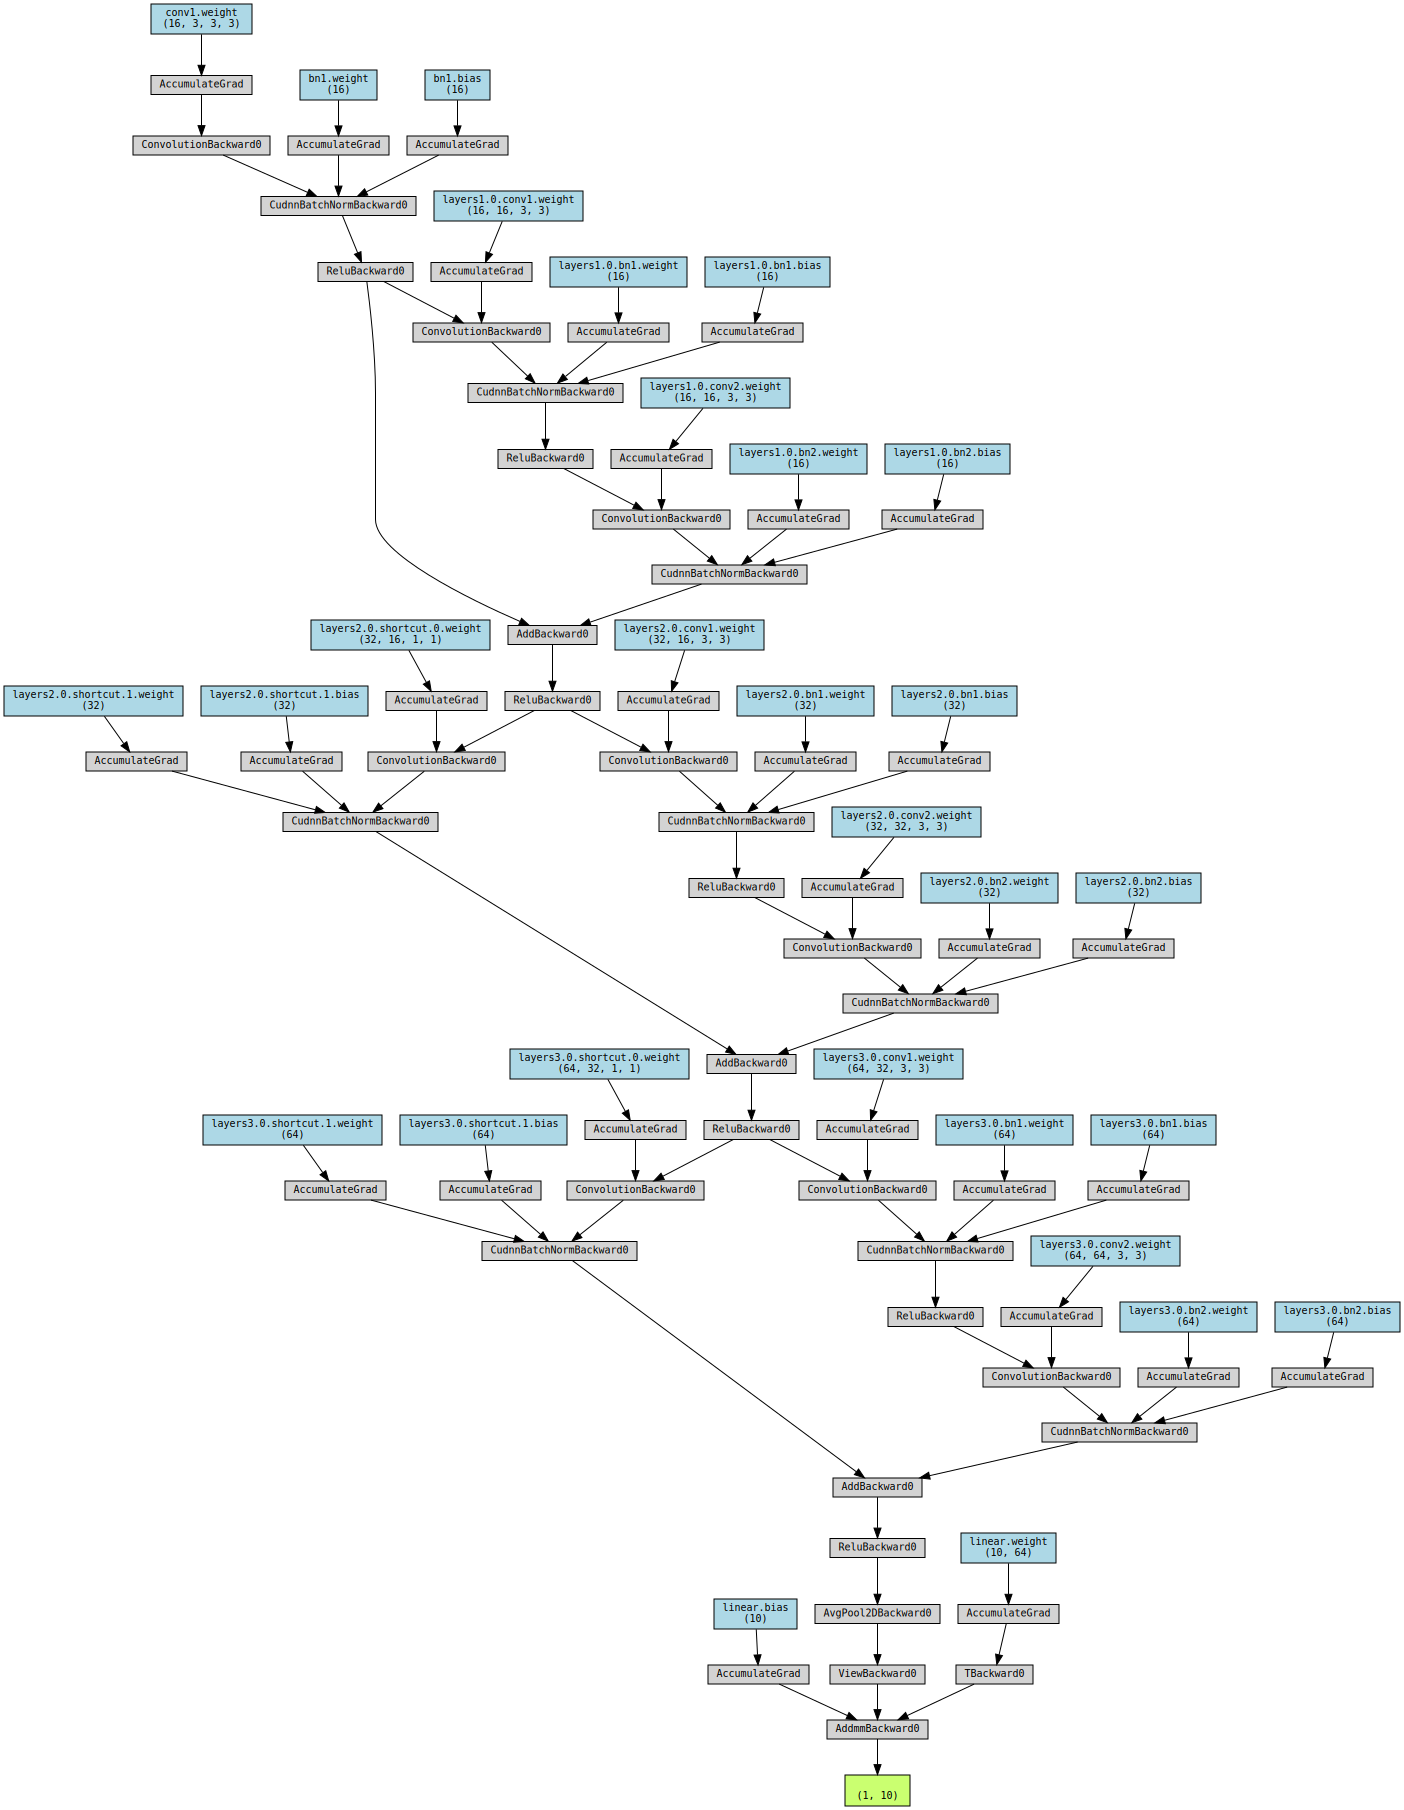

In [16]:
model     = ResNet().to(DEVICE)
optimizer = optim.SGD(model.parameters(), lr = LR, momentum = 0.9, weight_decay = 5 * 1e-4)

## 50 에폭 후에 학습률에 gamma 값을 곱해서 LR을 조절함.
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 50, gamma = 0.1)

## 모델 구조 시각화
x = torch.zeros(1, 3, 32, 32).to(DEVICE)
make_dot(model(x), params = dict(list(model.named_parameters())))

In [ ]:
## 학습을 돌려보자
for epoch in range(1, 301):
  scheduler.step()
  
  train_loss, train_acc = train(model, train_cifar_loader, optimizer)
  test_loss, test_acc = evaluate(model, test_cifar_loader)

  print(f'[{epoch} / 300] \nTrain Loss : {train_loss:.3f} | Train Acc : {train_acc:.3f} \nTest Loss : {test_loss:.3f} | Test Acc : {test_acc:.3f}\n')

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


[1 / 300] 
Train Loss : 0.013 | Train Acc : 37.188 
Test Loss : 1.459 | Test Acc : 46.794

[2 / 300] 
Train Loss : 0.010 | Train Acc : 52.766 
Test Loss : 1.232 | Test Acc : 55.742

[3 / 300] 
Train Loss : 0.009 | Train Acc : 59.656 
Test Loss : 1.390 | Test Acc : 53.908

[4 / 300] 
Train Loss : 0.008 | Train Acc : 63.882 
Test Loss : 0.982 | Test Acc : 65.448

[5 / 300] 
Train Loss : 0.007 | Train Acc : 66.756 
Test Loss : 0.909 | Test Acc : 67.968

[6 / 300] 
Train Loss : 0.007 | Train Acc : 68.624 
Test Loss : 0.943 | Test Acc : 66.978

[7 / 300] 
Train Loss : 0.007 | Train Acc : 70.264 
Test Loss : 1.255 | Test Acc : 58.732

[8 / 300] 
Train Loss : 0.006 | Train Acc : 71.638 
Test Loss : 0.831 | Test Acc : 71.652

[9 / 300] 
Train Loss : 0.006 | Train Acc : 72.838 
Test Loss : 0.951 | Test Acc : 68.516

[10 / 300] 
Train Loss : 0.006 | Train Acc : 74.120 
Test Loss : 0.760 | Test Acc : 73.112

[11 / 300] 
Train Loss : 0.006 | Train Acc : 74.874 
Test Loss : 0.738 | Test Acc : 74.05